## Dijkstra, A* e Networkx

### Autor: Ralphy Núñez Mercado

<p>
Crea un grafo ponderado a partir de un diccionario donde cada clave es un nodo y cada valor un diccionario.

Con ese  grafo y utilizando Networkx calcula el camino más corto entre dos nodos que indique el usuario y el valor de esa longitud, empleando el algoritmo de Dijkstra.

Muestra también de forma gráfica el grafo y el camino. Compáralo con el que se obtendría con A* (para la heurística puedes utilizar Manhattan, Euclidiana o simplemente dar un valor concreto)
</p>

<p>Importación de librerías</p>

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

<p>1. Crear un diccionario para representar el grafo </p>


In [3]:
grafo_dict = {
    'A': {'B': 4, 'C': 2},
    'B': {'A': 4, 'C': 1, 'D': 5},
    'C': {'A': 2, 'B': 1, 'D': 8, 'E': 10},
    'D': {'B': 5, 'C': 8, 'E': 2, 'F': 6},
    'E': {'C': 10, 'D': 2, 'F': 2},
    'F': {'D': 6, 'E': 2}
}

<p> Crear un grafo a partir del diccionario </p>


In [4]:
G = nx.Graph()
for nodo, adyacentes in grafo_dict.items():
    for vecino, peso in adyacentes.items():
        G.add_edge(nodo, vecino, weight=peso)


<p>Definir nodos de origen y destino para la búsqueda de caminos</p>

In [5]:
origen = 'A'
destino = 'F'

<p>Calcular el camino más corto usando el algoritmo de Dijkstra</p>


In [6]:
camino_dijkstra = nx.dijkstra_path(G, source=origen, target=destino)
longitud_dijkstra = nx.dijkstra_path_length(G, source=origen, target=destino)

<p >Calcular el camino más corto usando el algoritmo A* con heurística (0 para todos los nodos)</p>


In [7]:
camino_a_star = nx.astar_path(G, source=origen, target=destino, heuristic=lambda u, v: 0)
longitud_a_star = nx.astar_path_length(G, source=origen, target=destino, heuristic=lambda u, v: 0)

<p>Dibujar el grafo y resaltar el camino más corto encontrado por Dijkstra</p>


In [8]:
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<p>Dibujar todos los nodos y aristas</p>

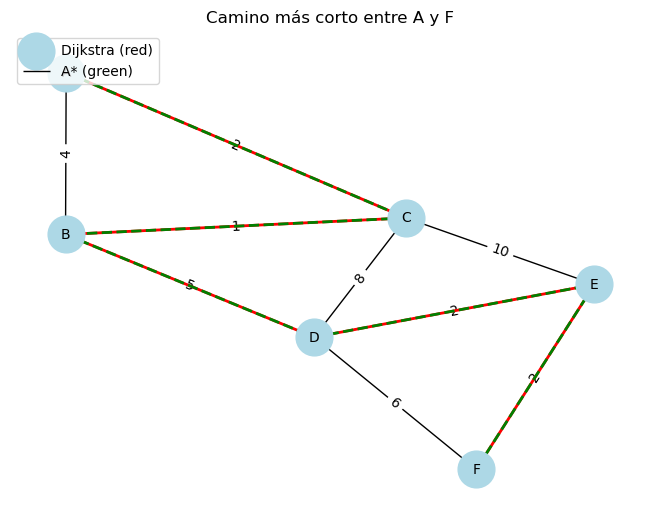

(['A', 'C', 'B', 'D', 'E', 'F'], 12, ['A', 'C', 'B', 'D', 'E', 'F'], 12)

In [15]:
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

# Resaltar el camino de Dijkstra

camino_edges_dijkstra = list(zip(camino_dijkstra, camino_dijkstra[1:]))
nx.draw_networkx_edges(G, pos, edgelist=camino_edges_dijkstra, edge_color='red', width=2, label='Dijkstra')

# Resaltar el camino de A*
camino_edges_a_estrella = list(zip(camino_a_star, camino_a_star[1:]))
nx.draw_networkx_edges(G, pos, edgelist=camino_edges_a_estrella, edge_color='green', style='dashed', width=2, label='A*')

# Agregar leyenda y título
plt.legend(['Dijkstra (red)', 'A* (green)'], loc='upper left')
plt.title(f"Camino más corto entre {origen} y {destino}")
plt.show()
(camino_dijkstra, longitud_dijkstra, camino_a_star, longitud_a_star)